# Neural Network Engine

En este notebook voy a explicar como funciona mi red neuronal.

## Creación de una instancia


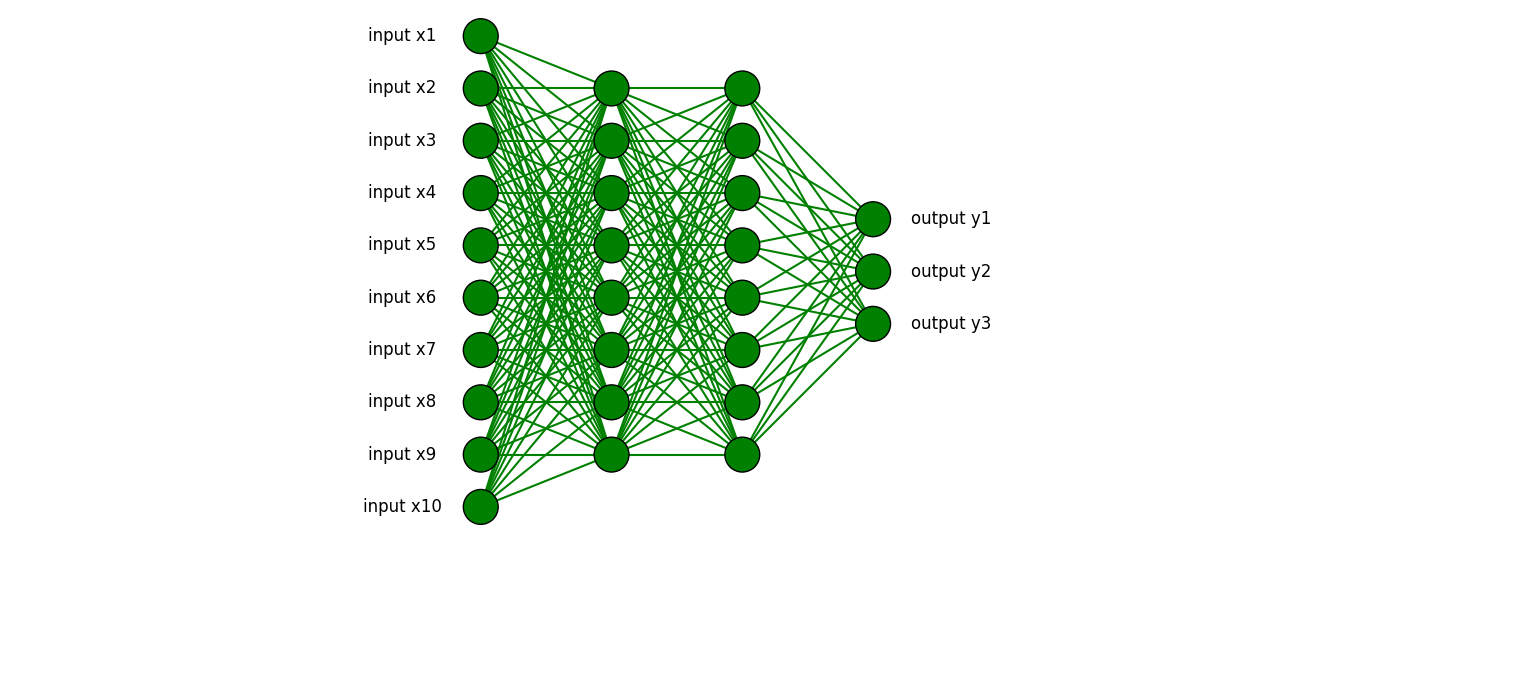

In [18]:
import numpy as np
from neural_network import train, predict, create_nn, test_nn
from nn_components.draw_nn import draw_nn
from nn_components.activations_functions import Relu, Tanh, LeakyRelu
from nn_components.loss_functions import MSELoss, CrossEntropyLoss
from nn_components.graphic_regression import learning_curve, dispersion_graph
from nn_components.optimazers import SGD, Adam, Adagrad


optimizers = [
    Adagrad(learning_rate=0.07),
    Adagrad(learning_rate=0.07),
    Adagrad(learning_rate=0.07)
]

activations = [LeakyRelu(alpha=0.017), LeakyRelu(alpha=0.017), LeakyRelu(alpha=0.017)]

nn = create_nn([10, 8, 8, 3], activation_function=activations, optimizers=optimizers)
draw_nn(nn)

# Entrenamiento de una red

La función **train** devuelve un historial del valor de pérdida durante el entrenamiento para poder hacer gráficas como las que se verán en las siguientes celdas.


Como parámetros necesita:
- La Red Neuronal
- La función de pérdida
- La derivada de la función de pérdida
- Los conjuntos de datos X, y
- Opcionalmente: Número de epochs, learning_rate y optimizador.


Es preciso que las variables X, y sean pasadas como arrays de numpy y tenga el siguiente shape:

- X.shape = (n_samples, n_features, 1)
- Y.shape = (n_samples, 1)

Esto se debe a que la red espera como datos de entrada un vector columna.

(Para simplicidad de la explicación vamos un conjunto de la datos muy reducido tanto para entrenamiento como prueba, los experimentos reales se encuentran en Neural-Network-OH/test)

In [27]:
X_train = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1], [0, 1, 1]])
y_train = np.array([[0], [1], [1], [1], [0], [0], [0]])

X_train = X_train.reshape((7, 3, 1))
y_train = y_train.reshape((7, 1))

optimizers = [Adam(learning_rate=0.01),
              Adam(learning_rate=0.01)]

activations = [Tanh(), Tanh()]

nn = create_nn([3, 2, 1], activation_function=activations, optimizers=optimizers)

loss = CrossEntropyLoss()

train_loss = train(nn, loss, X_train, y_train, epochs=700)

Final Loss = 0.023111236712549815


# Test

Para evaluar el rendimiento de la red con un conjunto de muestras hay que ejecutar uná celda como la siguiente:

Donde y_pred será el conjunto de predicciones para las entradas nuevas

In [28]:
_, _ = test_nn(nn, X_train, y_train)

Accuracy: 100.0%


In [29]:
y_pred = []
for X, y in zip(X_train, y_train):
    output = predict(nn, X)
    y_pred.append(output)
    print(f'Pred: {output[0]}, Actual: {y}')

Pred: [0.00421236], Actual: [0]
Pred: [0.93116421], Actual: [1]
Pred: [0.95635946], Actual: [1]
Pred: [0.95590004], Actual: [1]
Pred: [0.04992987], Actual: [0]
Pred: [-0.08446855], Actual: [0]
Pred: [0.04942254], Actual: [0]


Aquí tenemos la pérdida durante el entrenamiento y el gráfico de dispersión entre los valores predichos y los reales

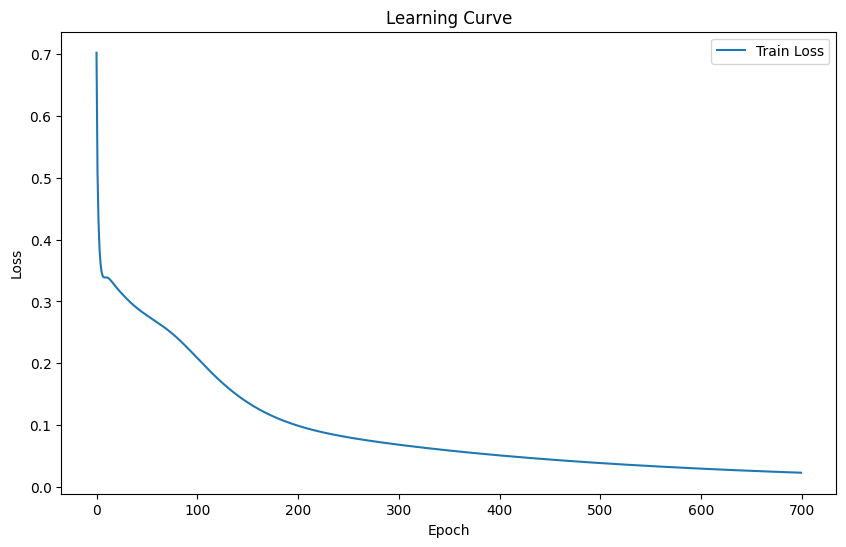

In [31]:
learning_curve(train_loss)